<a href="https://colab.research.google.com/github/Bharaths12/Github-API-Finder/blob/main/Forest_Fires_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv('amazon.csv', encoding='latin1', parse_dates=['date'])

In [13]:
data.dtypes

,0
year,int64
state,object
month,object
number,float64
date,datetime64[ns]


**Check for Duplicate data and drop them**

In [15]:
dup_data=data.duplicated().any()

In [18]:
dup_data

np.True_

In [19]:
data=data.drop_duplicates()

In [20]:
data.shape

(6422, 5)

# **Check Null values in the dataset**

In [22]:
data.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


# **overall statistics about the dataframe**

In [28]:
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# **Rename Month Names to english**

In [24]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [30]:
data['month_new']=data['month'].map({'Janeiro':'jan',
                                        'Fevereiro':'feb',
                                        'Março':'march',
                                        'Abril':'april',
                                        'Maio':'may',
                                        'Junho':'jun',
                                        'Julho':'july',
                                        'Agosto':'august',
                                        'Setembro': 'sep',
                                        'Outubro':'oct',
                                        'Novembro': 'nov',
                                        'Dezembro': 'dec'
})

## **Total Number of Fires Registered**

In [36]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [37]:
data.shape

(6422, 6)

# **In Which month maximum number of fires registered**

In [38]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [46]:
data1=data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


<Axes: xlabel='month_new', ylabel='number'>

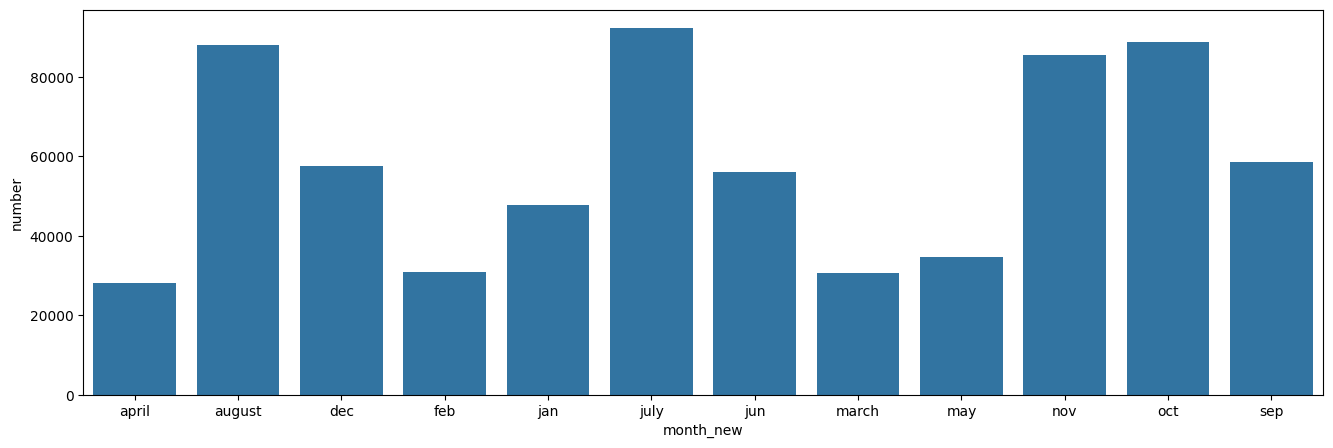

In [47]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data=data1)

# **in Which year maximum Number of Forest Fires were Repoerted**

In [49]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [52]:
data2=data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


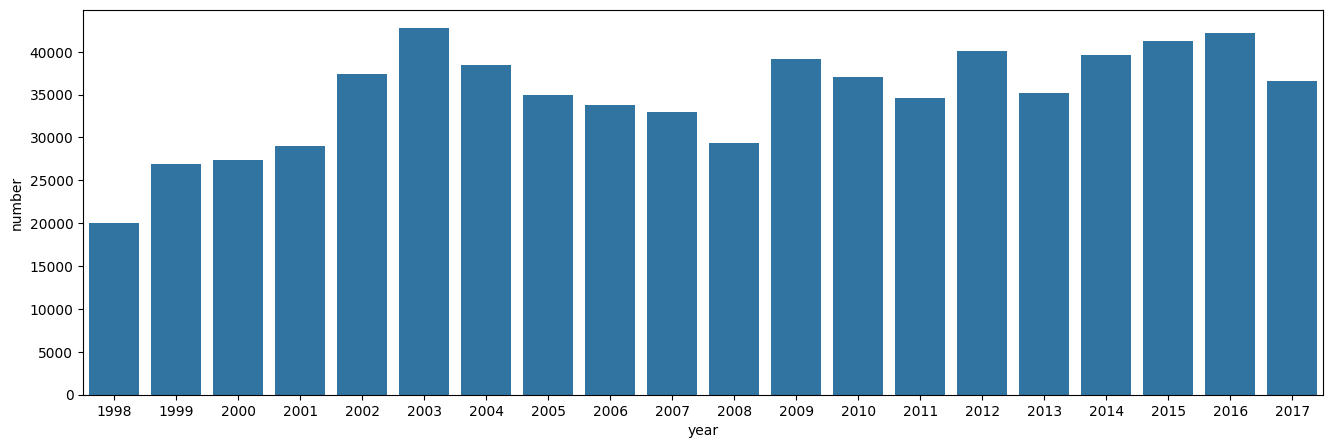

In [56]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data2)
plt.show()

## **In which state maximum Number of Forest Fires were Reported**

In [58]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [62]:
data3=data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


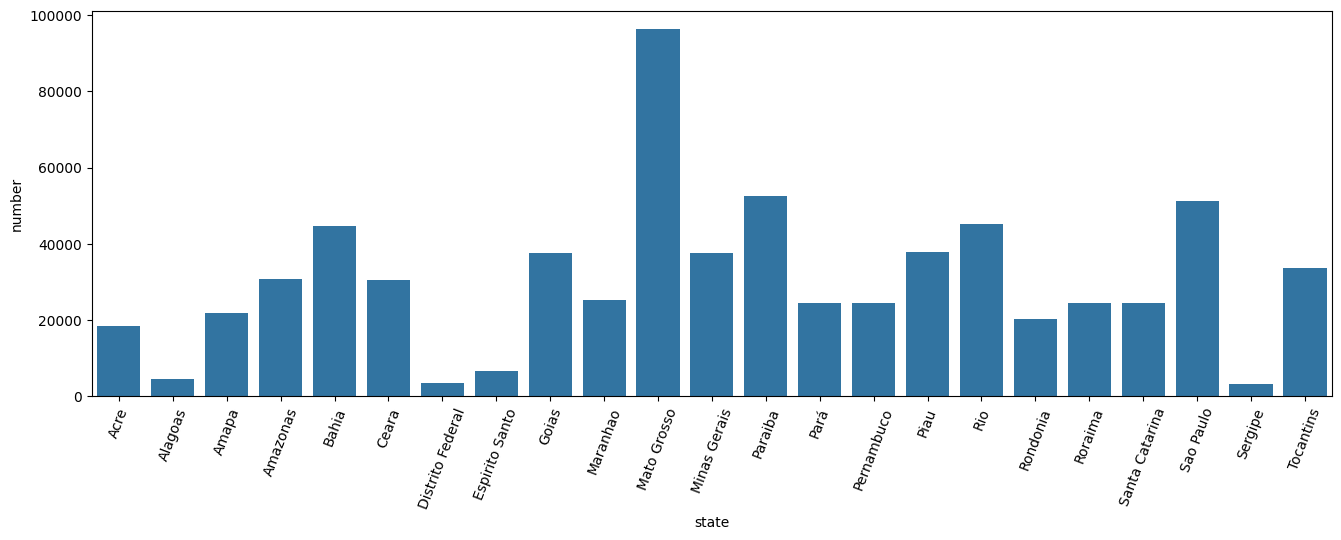

In [67]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data3)
plt.xticks(rotation=69)
plt.show()

# **Find total Number of Fire were reported in Amazonas**

In [69]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [77]:
data[data['state']=='Amazonas']['number'].sum()

np.float64(30650.129)

# **Display Number of fires were reported in Amazonas(yearwise)**

In [79]:
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [89]:
data4=data[data['state']=='Amazonas']
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


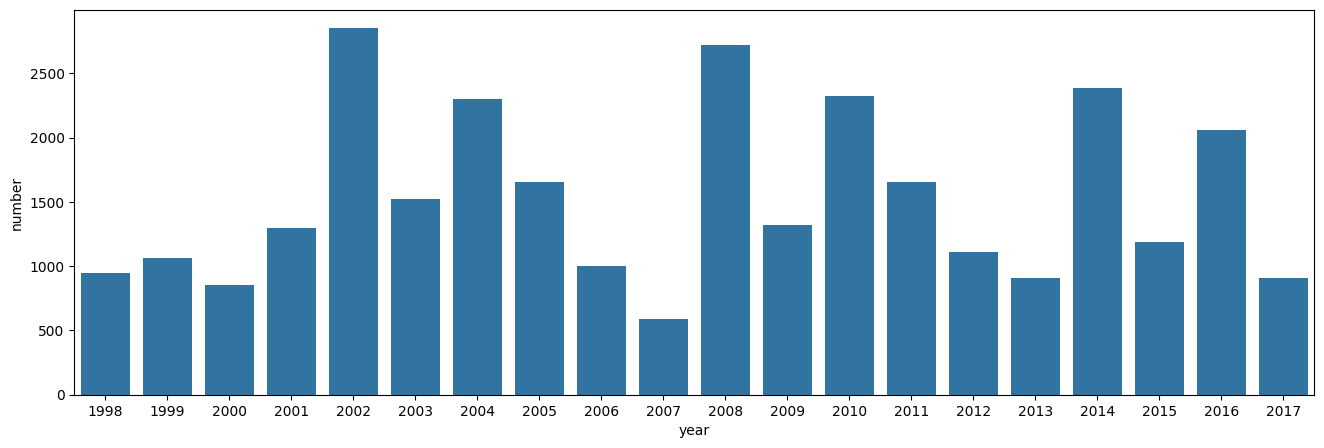

In [91]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data5)
plt.show()

## **Display Number of Fires Were Reported in Amazonas(daywise)**

In [93]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [105]:
data6=data[data['state']=='Amazonas']
day = data6.groupby(data6['date'].dt.dayofweek)['number'].sum()

import calendar

day.index =[calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

In [106]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


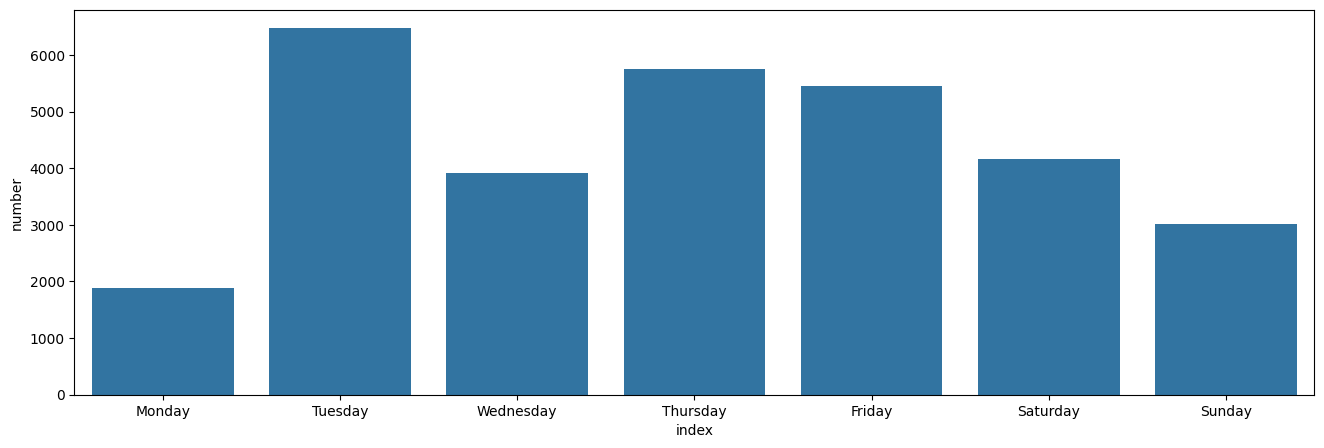

In [110]:
plt.figure(figsize=(16,5))
sns.barplot(x='index',y='number',data=day)
plt.show()

## **Find Total Number of Fires Were Reported in 2015 And Visualize data Based on each 'Month'**

In [111]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [118]:
fire=data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()

In [119]:
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


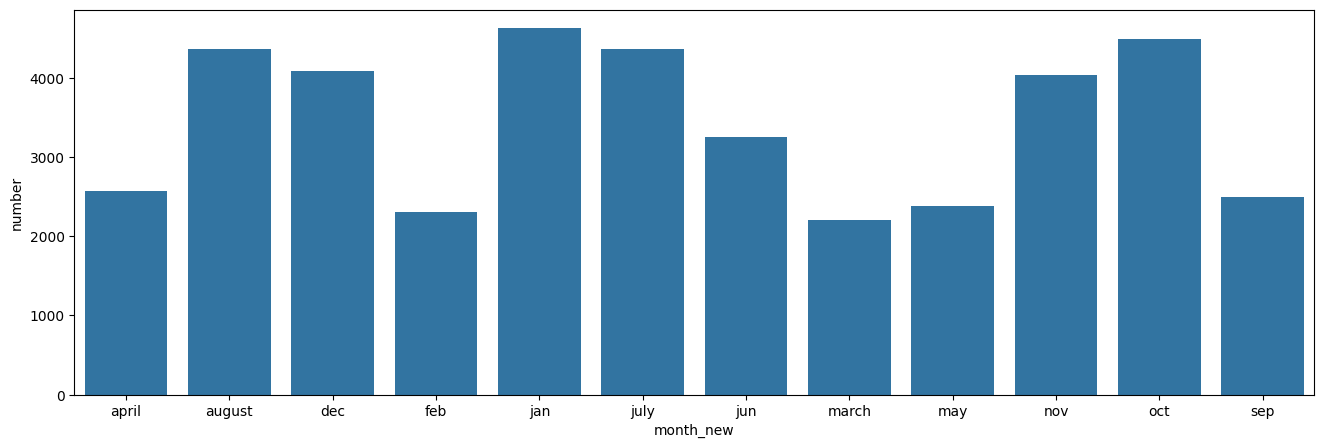

In [120]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data=fire)
plt.show()

## **Find Average Number of Fires Reported From Highest to lowest (state-state)**

In [121]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [125]:
data8 = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [126]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


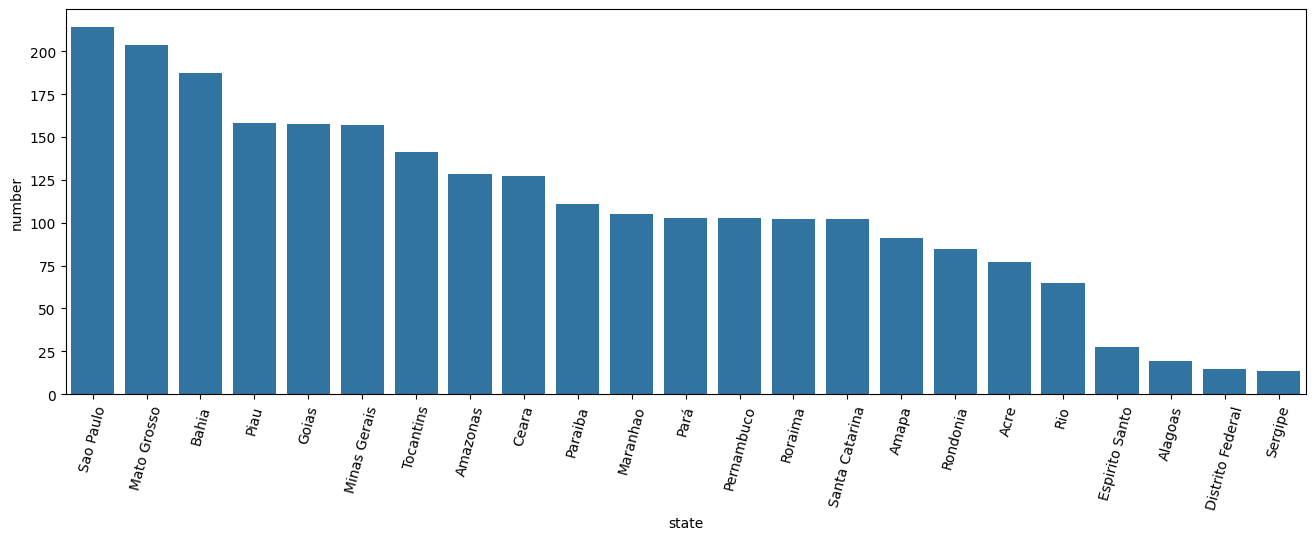

In [128]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data8)
plt.xticks(rotation=75)
plt.show()

## **Find the state names where fires were Reported in 'Dec' Month**

In [129]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [147]:
data7=data[data['month_new']=='dec']['state'].unique()

In [148]:
data7

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)